Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.0140 - mae: 0.0980 - val_loss: 0.0085 - val_mae: 0.0744
Epoch 2/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0071 - mae: 0.0712 - val_loss: 0.0095 - val_mae: 0.0904
Epoch 3/100
1/1 [==============================] - 0s 140ms/step - loss: 0.0045 - mae: 0.0556 - val_loss: 0.0119 - val_mae: 0.0987
Epoch 4/100
1/1 [==============================] - 0s 136ms/step - loss: 0.0040 - mae: 0.0567 - val_loss: 0.0138 - val_mae: 0.0998
Epoch 5/100
1/1 [==============================] - 0s 110ms/step - loss: 0.0040 - mae: 0.0525 - val_loss: 0.0143 - val_mae: 0.1040
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0037 - mae: 0.0497 - val_loss: 0.0135 - val_mae: 0.1019
Epoch 7/100
1/1 [==============================] - 0s 148ms/step - loss: 0.0032 - mae: 0.0448 - val_loss: 0.0118 - val_mae: 0.0933
Epoch 8/100
1/1 [==============================] - 0s 115ms/step - loss: 0.0026 - mae: 0

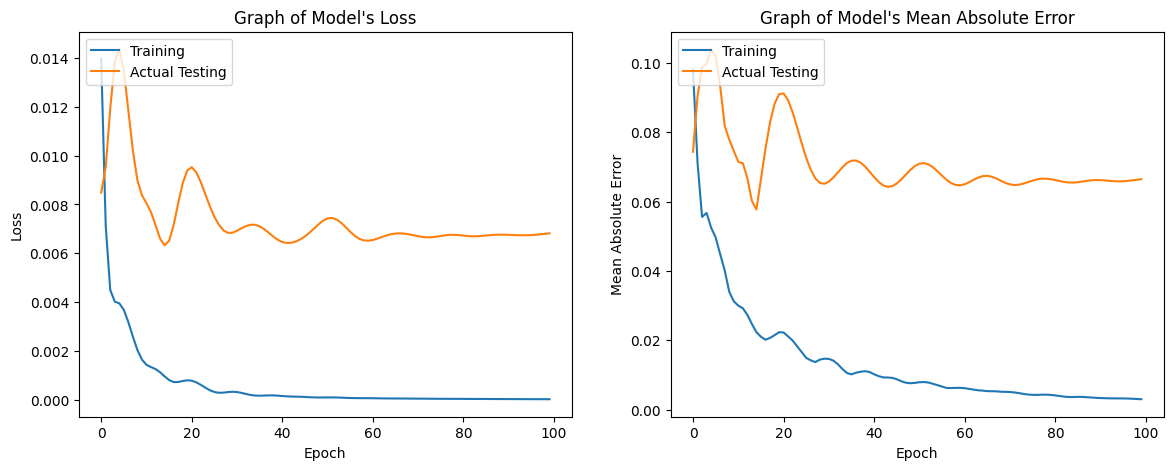

1/1 [==============================] - 0s 56ms/step


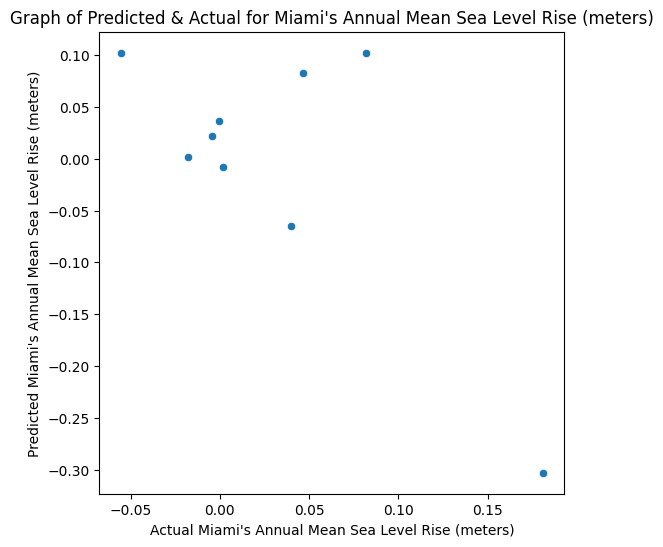

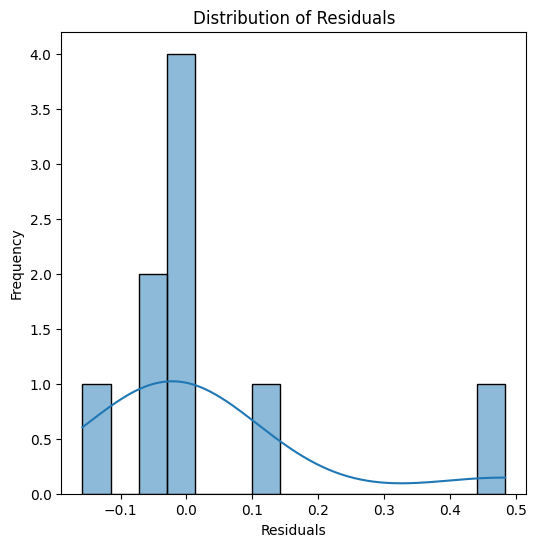

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Miami_mean_sea_level_dataset.csv')

# Split the dataset into features and target variable
X = df[['mean_local_temp', 'mean_atmospheric_CO2', 'mean_ice_sheet_extent', 'mean_precipitation']]
y = df['mean_sea_level_rise']

# Split the dataset into training and actual test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Graph of Model\'s Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Actual Testing'], loc='upper left')

# Plot training & validation Mean Absolute Error values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Graph of Model\'s Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Training', 'Actual Testing'], loc='upper left')

plt.show()

# Predictions and residuals
predictions = model.predict(X_test_scaled).flatten()
residuals = y_test - predictions

# Plotting predictions vs actual values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Miami\'s Annual Mean Sea Level Rise (meters)')
plt.ylabel('Predicted Miami\'s Annual Mean Sea Level Rise (meters)')
plt.title('Graph of Predicted & Actual for Miami\'s Annual Mean Sea Level Rise (meters)')
plt.show()

# Plotting distribution of residuals
plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()



